# ✨📚 Libraries 📚✨

In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
#plt.style.use('../mplstyles/stylelib/standard.mplstyle')

import numpy as np
import math
import pandas as pd

In [2]:
import decay_chains as dc
from decay_chains import Isotope
from importlib import reload
reload(dc)

Th_232 = Isotope("Th_232", 1.41e10 * 365 * 24 * 3600, [("alpha", "Ra_228", 1.0)], 6e23) 

# Modeling Decay Chains - 232Th and 235U ☢️🧑‍🔬
🤩 235-Uranium and 232-Thorium are radioactive isotopes which are known to be fairly abundant in the surrounding rock and walls at SNOLAB. SOURCES4C is a computational code that takes levels of radioactive contamination in materials and outputs the neutron source strengths they induce in terms of ($\alpha$,n) and spontaneous fission (SF). The Radiation Safety Information Computational Center (RSICC)[[RSICC][RSICC]] maintains and distributes the SOURCES code. The exact isotopic concentrations of isotopes in the 232-Thorium and 235-Uranium decay chains at SNOLAB are unknown. The inputs for the SOURCES4C code assumes secular equilibrium for both decay chains. Here, the relative abundances of alpha decayers present in these decay chains over the timescales of 232-Th and 235-U half-lives respectively, are plotted to ensure this assumption is reasonable, and to determine the concentration ratios of each isotope in the decay chains. The concentrations of each isotope are calculated abiding by the differential equations outlined here: [[Decay chain differential equations: Solutions through matrix analysis][DiffEqs]]. 🥳

[DiffEqs]:https://www.sciencedirect.com/science/article/pii/S0010465518302613 "Decay Chain solutions thru matrix analysis"
[RSICC]:https://www.ornl.gov/onramp/rsicc "Oak Ridge Computational Page"

## ⚛️ Defining Decay Chains ⚛️
Thorium-232 and Uranium-235 decay chains are defined as dictionaries in `decay_chains.py`, and put in lists of the `Isotope` class. Isotopes belonging to other decay chains can be defined with `Isotope(name, half_life, decay_modes)`. Decay chain isotopes, half-lives, daughter isotopes, decay modes and branching ratios retrieved from [[NNDC NuDat 3.0 DB][NNDC]].

[NNDC]:https://www.nndc.bnl.gov/nudat3/ "NNDC at BNL interactive database"

In [11]:
print("Thorium-232 Decay Chain Dictionary: ", dc.Th_decay_data)
print()
print("Uranium-235 Decay Chain Dictionary: ", dc.U_decay_data)

Thorium-232 Decay Chain Dictionary:  {'Ra_228': {'half_life': 179755200.0, 'decay_modes': [('beta', 'Ac_228', 1.0)]}, 'Ac_228': {'half_life': 366.0, 'decay_modes': [('beta', 'Th_228', 1.0)]}, 'Th_228': {'half_life': 59918400.0, 'decay_modes': [('alpha', 'Ra_224', 1.0)]}, 'Ra_224': {'half_life': 311040.0, 'decay_modes': [('alpha', 'Rn_220', 1.0)]}, 'Rn_220': {'half_life': 55, 'decay_modes': [('alpha', 'Po_216', 1.0)]}, 'Po_216': {'half_life': 0.14, 'decay_modes': [('alpha', 'Pb_212', 1.0)]}, 'Pb_212': {'half_life': 38160.0, 'decay_modes': [('beta', 'Bi_212', 1.0)]}, 'Bi_212': {'half_life': 3660, 'decay_modes': [('beta', 'Po_212', 0.6406), ('alpha', 'Tl_208', 0.3594)]}, 'Po_212': {'half_life': 3e-07, 'decay_modes': [('alpha', 'Pb_208', 1.0)]}, 'Tl_208': {'half_life': 186.0, 'decay_modes': [('beta', 'Pb_208', 1.0)]}}

Uranium-235 Decay Chain Dictionary:  {'Th_231': {'half_life': 91872.0, 'decay_modes': [('beta', 'Pa_231', 1.0)]}, 'Pa_231': {'half_life': 1033119360000, 'decay_modes': [('be

## Solve Systems of Differential Equations 🧮
`returns_dydt` (change name later maybe) takes the inputs

[-935300.1238165437, 935300.1238165437, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


C:\Users\cecih\AppData\Local\Temp\ipykernel_27660\668098296.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([f"{tick:.2g}" for tick in new_ticks])


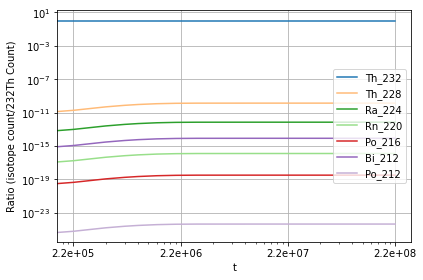

4446576000.0


In [5]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

name_to_index = {iso.name: idx for idx, iso in enumerate(isotope_list)}

#Initial Counts
y0=[]
for i in isotope_list:
    y0.append(i.count)

# Sum over j<n: br(j->n)*lambda_j*N_n - lambda_n*N_n
def returns_dydt(t, y, isotopes):
    dydt = [0.0] * len(isotopes)
    branching_ratios=[]
    for i, isotope in enumerate(isotopes):
        lambda_i = math.log(2) / isotope.half_life
        dydt[i] -= lambda_i * y[i] 
        for j, parent in enumerate(isotopes):
            for mode, daughter_name, br in parent.decay_modes:
                if daughter_name == isotope.name:
                    lambda_j = math.log(2) / parent.half_life
                    branching_ratios.append(br)
                    dydt[i]+=br*(math.log(2)/parent.half_life)*y[j]
                else:
                    branching_ratios.append(0)
                    dydt[i]+=0
    

    return dydt

#normalize using lambda?
#set initial condition
t_max = 10e10
# t_max = Th_232.half_life
t_points = 999
t = np.linspace(0, t_max, t_points)
# solving ODE
print(returns_dydt(t, y0, isotope_list))


sol_y = solve_ivp(returns_dydt, [0, t_max], y0, args=(isotope_list,), method='BDF', t_eval=t)

# plot results ignore for now
import matplotlib.pyplot as plt
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in range(12)]

for i, isotope in enumerate(isotope_list):
    # print(isotope.name)
    # print(isotope.decay_modes[0])
    # print(any('alpha' in sublist for sublist in isotope.decay_modes))
    if (any('alpha' in sublist for sublist in isotope.decay_modes)) & (isotope.name != "Pb_208"):
        plt.plot(sol_y.t, sol_y.y[i]/Th_232.count, label=isotope.name, color=colors[i])
plt.legend(loc='right')
plt.yscale('log')
plt.xscale('log')
# plt.ylim(0,10000000)
new_ticks = plt.gca().get_xticks() / 1.41e10 * 365 * 24 * 3600
plt.gca().set_xticklabels([f"{tick:.2g}" for tick in new_ticks])

plt.xlabel('t')
plt.ylabel('Ratio (isotope count/232Th Count)')
plt.grid()
plt.tight_layout()

plt.show()

print(10e-9*Th_232.half_life)


# Modeling Decay Chain for Uranium 235

In [6]:
decay_data1 = {
    "Th_231": {
        "half_life": 25.52 * 3600,
        "decay_modes": [("beta", "Pa_231", 1.0)]
    },
    "Pa_231": {
        "half_life": 32760 * 365 * 24 * 3600,
        "decay_modes": [("beta", "Ac_227", 1.0)]
    },
    "Ac_227": {
        "half_life": 21.772 * 365 * 24 * 3600,
        "decay_modes": [("alpha", "Fr_223", 0.0138),
                       ("beta", "Th_227", 0.9862)]
    },
    "Th_227": {
        "half_life": 18.68 *24*3600,
        "decay_modes": [("alpha", "Ra_223", 1)]
    },
    "Ra_223": {
        "half_life": 11.43 *24*3600,
        "decay_modes": [("alpha", "Rn_219", 1)]
    },
    "Fr_223": {
        "half_life": 22 * 60,
        "decay_modes": [("alpha", "Ra_223", 0.00006),
                       ("beta", "At_219", 0.99994)]
    },
    "At_219": {
        "half_life": 56,
        "decay_modes": [("alpha", "Bi_215", 0.936),
                       ("beta", "Rn_219", 0.064)]
    },
    "Rn_219": {
        "half_life": 3.93,
        "decay_modes": [("alpha", "Po_215", 1)]
    },
    "Bi_215": {
        "half_life": 7.6 * 60,
        "decay_modes": [("beta", "Po_215", 1)]
    },
    "Po_215": {
        "half_life": 1.781e-3,
        "decay_modes": [("alpha", "Pb_211", 0.9999977),
                       ("beta", "At_215", 0.0000023)]
    },
    "At_215": {
        "half_life": 1e-4,
        "decay_modes": [("alpha", "Bi_211", 1)]
    },
    "Pb_211":{
        "half_life": 36.1 * 60,
        "decay_modes": [("beta", "Bi_211", 1)]
    },
    "Bi_211":{
        "half_life": 2.14 * 60,
        "decay_modes": [("alpha", "Tl_207", 0.99724), 
                        ("beta","Po_211", 0.00276)]
    },
    "Po_211":{
        "half_life": 0.516,
        "decay_modes":[("alpha", "Pb_207", 1)]
    },
    "Tl_207":{
        "half_life": 4.77 * 60,
        "decay_modes":[("beta", "Pb_207", 1)]
    }
}

#Define Parent outside dictionary bc need to identify count, and stable daughter
U_235 = Isotope("U_235", 7.04e8*365*24*3600, [("alpha", "Th_231", 1.0)], 6e23)
Pb_207 = Isotope("Pb_207", float('inf'), [], is_stable=True)

isotopes1 = {}
for name, data in decay_data1.items():
    isotopes1[name] = Isotope(name, data["half_life"], data["decay_modes"])

# List of Isotope instances
isotope_list1 = [U_235] + list(isotopes1.values()) + [Pb_207]

C:\Users\cecih\AppData\Local\Temp\ipykernel_27660\860822700.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([f"{tick:.2g}" for tick in new_ticks])


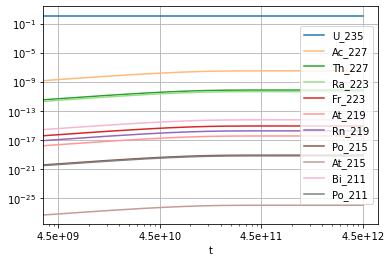

In [7]:
from math import floor
#Initial Counts
y0_U=[]
for i in isotope_list1:
    y0_U.append(i.count)
    
#set initial condition
t_max = 10e13
# t_max = Th_232.half_life
t_points = 999
t = np.linspace(0, t_max, t_points)
# solving ODE
sol_y1 = solve_ivp(returns_dydt, [0, t_max], y0_U, method='BDF', t_eval=t, args=(isotope_list1,))

# plot results ignore for now
import matplotlib.pyplot as plt
cmap1 = plt.get_cmap('tab20')
colors = [cmap1(i) for i in range(17)]

for i, isotope in enumerate(isotope_list1):
    # print(isotope.name)
    # print(isotope.decay_modes[0])
    # print(any('alpha' in sublist for sublist in isotope.decay_modes))
    if (any('alpha' in sublist for sublist in isotope.decay_modes)) & (isotope.name != "Pb_207"):
        plt.plot(sol_y1.t, sol_y1.y[i]/U_235.count, label=isotope.name, color=colors[i])
plt.legend(loc='right')
plt.yscale('log')
plt.xscale('log')
# plt.ylim(0,10000000)
new_ticks = plt.gca().get_xticks()/ 7.04e8*365*24*3600
plt.gca().set_xticklabels([f"{tick:.2g}" for tick in new_ticks])
plt.xlabel('t')
plt.grid()
plt.show()

